In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from numpy import where

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import ComplementNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import os

In [4]:
# Reading in all folds of extracted blink features

f1p1 = pd.read_csv(r'C:\Users\pnanp\Desktop\Minor.AI4S.S6\Personal Project\Features\f1p1.csv', index_col = 0)
f1p1['Set'] = 'S1'

f1p2 = pd.read_csv(r'C:\Users\pnanp\Desktop\Minor.AI4S.S6\Personal Project\Features\f1p2.csv', index_col = 0)
f1p2['Set'] = 'S2'

f2p1 = pd.read_csv(r'C:\Users\pnanp\Desktop\Minor.AI4S.S6\Personal Project\Features\f2p1.csv', index_col = 0)
f2p1['Set'] = 'S3'

f2p2 = pd.read_csv(r'C:\Users\pnanp\Desktop\Minor.AI4S.S6\Personal Project\Features\f2p2.csv', index_col = 0)
f2p2['Set'] = 'S4'

f3p1 = pd.read_csv(r'C:\Users\pnanp\Desktop\Minor.AI4S.S6\Personal Project\Features\f3p1.csv', index_col = 0)
f3p1['Set'] = 'S5'

In [5]:
# Concatenate imported folds into one dataframe
df = pd.concat([f1p1,f1p2,f2p1,f2p2,f3p1]).reset_index(drop = True)
df.head()

,Duration,Amplitude,Frequency,State,PERCLOS,Set
0,4.0,0.113577,0.037037,0s1.mp4,14.814815,S1
1,4.0,0.083621,0.037037,0s1.mp4,14.814815,S1
2,8.0,0.085546,0.031915,0s1.mp4,17.021277,S1
3,73.0,0.180694,0.018692,0s1.mp4,41.588785,S1
4,3.0,0.110899,0.019841,0s1.mp4,36.507937,S1


In [6]:
# Splitting the State column to get the state and participant
Participant = []

for i in df.index:
    p = 0
    p = df.iloc[i, 3].split('s')[1].split('.')[0]
    df.iloc[i, 3] = df.iloc[i, 3].split('s')[0]
    Participant.append(int(p))

df['Participant'] = Participant
df['State'] = pd.to_numeric(df.State)
# df.reset_index(level=0, inplace=True)

df.head()

,Duration,Amplitude,Frequency,State,PERCLOS,Set,Participant
0,4.0,0.113577,0.037037,0,14.814815,S1,1
1,4.0,0.083621,0.037037,0,14.814815,S1,1
2,8.0,0.085546,0.031915,0,17.021277,S1,1
3,73.0,0.180694,0.018692,0,41.588785,S1,1
4,3.0,0.110899,0.019841,0,36.507937,S1,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6889 entries, 0 to 6888
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Duration     6889 non-null   float64
 1   Amplitude    6889 non-null   float64
 2   Frequency    6889 non-null   float64
 3   State        6889 non-null   int64  
 4   PERCLOS      6889 non-null   float64
 5   Set          6889 non-null   object 
 6   Participant  6889 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 376.9+ KB


[Text(0.5, 1.0, 'Set 5'), Text(0, 0.5, 'Blinks')]

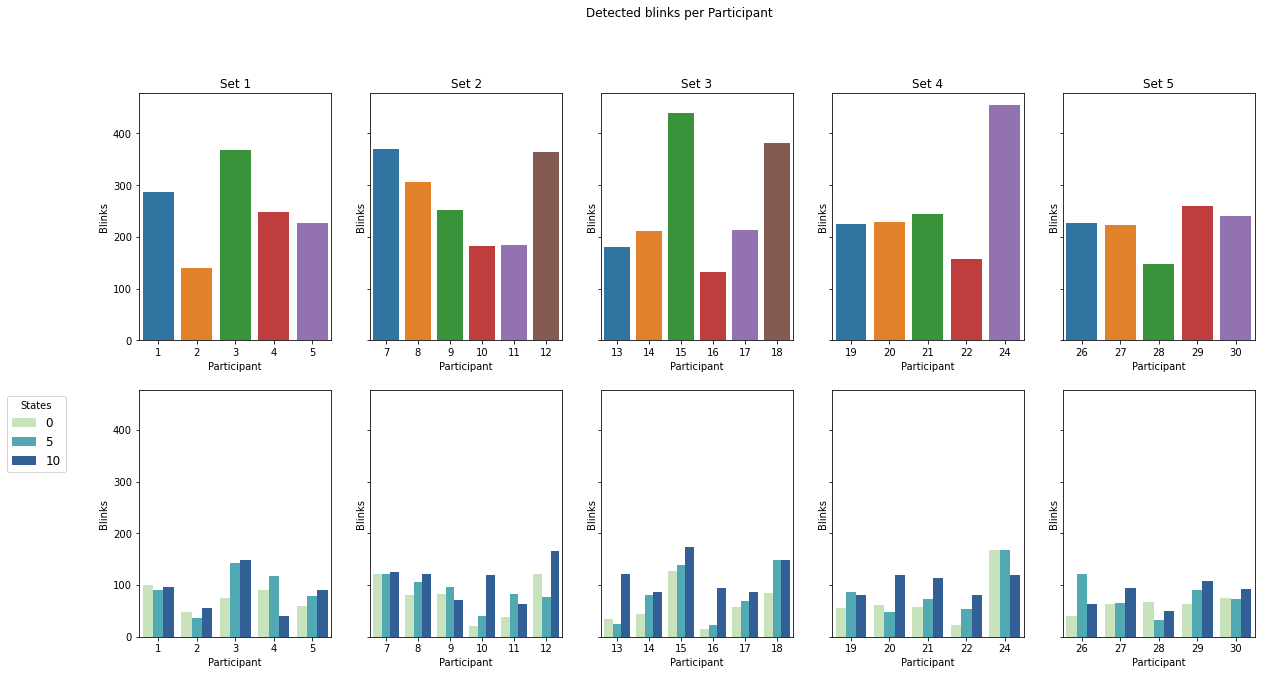

In [8]:
fig,ax = plt.subplots(2,5, figsize = (20, 10), sharey = True)
fig.suptitle('Detected blinks per Participant', y = 1)

sns.countplot(data = df[df['Set'] == 'S1'], x = 'Participant', hue = 'State', palette = 'YlGnBu', ax = ax[1,0])
ax[1,0].set(ylabel = 'Blinks')
ax[1,0].legend(bbox_to_anchor=(-0.35, 1), prop = {'size': 12}, title = 'States')
                                      
sns.countplot(data = df[df['Set'] == 'S2'], x = 'Participant', hue = 'State', palette = 'YlGnBu', ax = ax[1,1])
ax[1,1].set(ylabel = 'Blinks')   
ax[1,1].legend().remove()

sns.countplot(data = df[df['Set'] == 'S3'], x = 'Participant', hue = 'State', palette = 'YlGnBu', ax = ax[1,2])
ax[1,2].set(ylabel = 'Blinks')
ax[1,2].legend().remove()

sns.countplot(data = df[df['Set'] == 'S4'], x = 'Participant', hue = 'State', palette = 'YlGnBu', ax = ax[1,3])
ax[1,3].set(ylabel = 'Blinks')
ax[1,3].legend().remove()

sns.countplot(data = df[df['Set'] == 'S5'], x = 'Participant', hue = 'State', palette = 'YlGnBu', ax = ax[1,4])
ax[1,4].set(ylabel = 'Blinks')
ax[1,4].legend().remove()

sns.countplot(data = df[df['Set'] == 'S1'], x = 'Participant', ax = ax[0,0])
ax[0,0].set(title = 'Set 1', ylabel = 'Blinks')

sns.countplot(data = df[df['Set'] == 'S2'], x = 'Participant', ax = ax[0,1])
ax[0,1].set(title = 'Set 2', ylabel = 'Blinks')

sns.countplot(data = df[df['Set'] == 'S3'], x = 'Participant', ax = ax[0,2])
ax[0,2].set(title = 'Set 3', ylabel = 'Blinks')

sns.countplot(data = df[df['Set'] == 'S4'], x = 'Participant', ax = ax[0,3])
ax[0,3].set(title = 'Set 4', ylabel = 'Blinks')

sns.countplot(data = df[df['Set'] == 'S5'], x = 'Participant', ax = ax[0,4])
ax[0,4].set(title = 'Set 5', ylabel = 'Blinks')

Text(0.5, 1.0, 'PERCLOS')

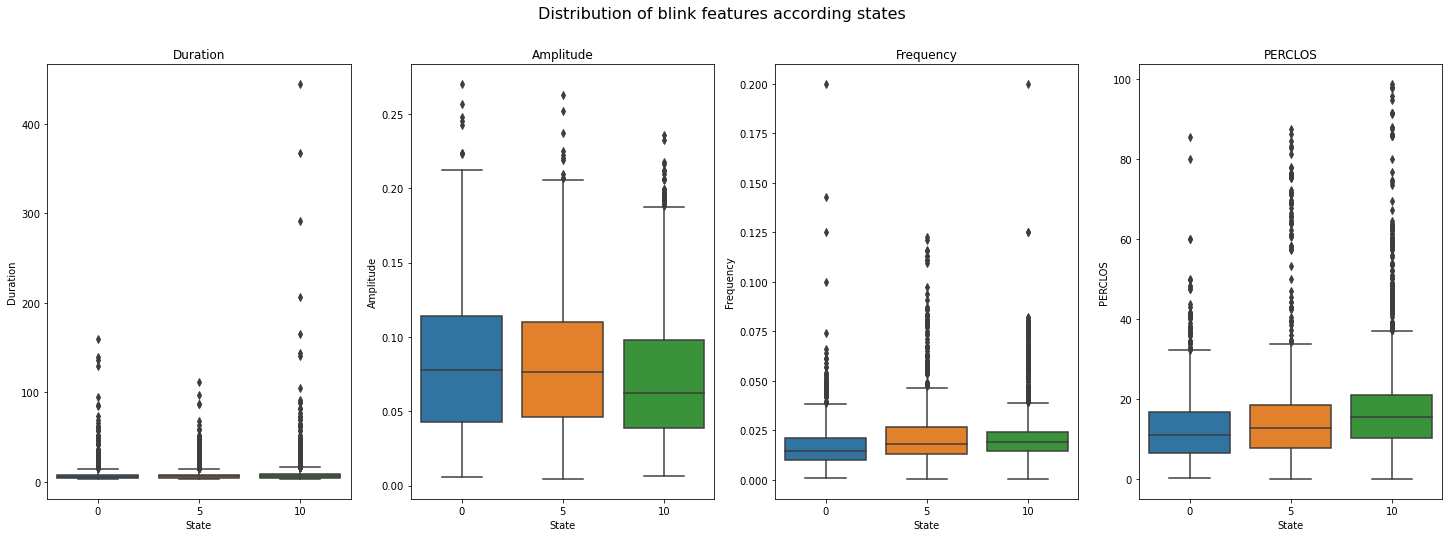

In [9]:
fig,ax = plt.subplots(1,4,figsize = (25,8))
fig.suptitle('Distribution of blink features according states', size = 16)

sns.boxplot(x = 'State', y="Duration",data=df, ax = ax[0])
ax[0].set_title('Duration')

sns.boxplot(x = 'State', y="Amplitude",data=df, ax = ax[1])
ax[1].set_title('Amplitude')

sns.boxplot(x = 'State', y="Frequency",data=df, ax = ax[2])
ax[2].set_title('Frequency')

sns.boxplot(x = 'State', y="PERCLOS",data=df, ax = ax[3])
ax[3].set_title('PERCLOS')

In [8]:
# Removing all outliers and create a dataframe for correlation check
dfNoOutlier = df.copy()
var = ['Amplitude','Frequency','Duration','PERCLOS']
for c in var:
    q1 = dfNoOutlier[c].quantile(0.25)
    q2 = dfNoOutlier[c].quantile(0.75)
    q3 = dfNoOutlier[c].quantile(0.75)
    iqr = q3 - q1
    filter = (dfNoOutlier[c] >= q1 - 1.5 * iqr) & (dfNoOutlier[c] <= q3 + 1.5 * iqr)
    dfNoOutlier = dfNoOutlier.loc[filter]

In [9]:
dfNoOutlier.shape

(5760, 7)

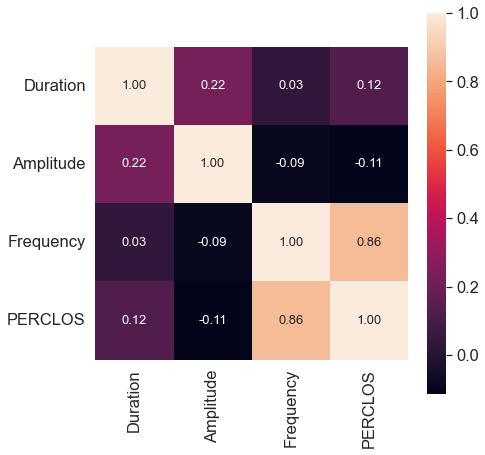

In [10]:
var = ['Duration', 'Amplitude', 'Frequency', 'PERCLOS']
correlation = np.corrcoef(dfNoOutlier[var].values, rowvar = False)
sns.set(font_scale = 1.5)
plt.rcParams['figure.figsize'] = (7,7)
heatmap = sns.heatmap(correlation, cbar= True, annot = True, square = True, 
                      fmt = '.2f', annot_kws = {'size': 13}, yticklabels = var, xticklabels = var)

In [11]:
# Splitting data into features and target
y = df.State
X = df[['Amplitude','Frequency','Duration']]

# summarize class distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=0, n=1877 (27.246%)
Class=10, n=2731 (39.643%)
Class=5, n=2281 (33.111%)


In [12]:
# Normalize and split data into train and test sets
X = preprocessing.normalize(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,random_state = 42)

#### Naive Bayes

In [13]:
# Training
blinkNB = ComplementNB()
blinkNB.fit(X_train, y_train)
y_pred = blinkNB.predict(X_test)
NBA = round(accuracy_score(y_test, y_pred)*100,2)

# Printing evaluation statistics
print('Classification report')
print('-------------------------------')
print(classification_report(y_test, y_pred))
print('_______________________________')
print('Accuracy: {}%'.format(NBA))

Classification report
-------------------------------
              precision    recall  f1-score   support

           0       0.34      0.41      0.37       624
           5       0.42      0.06      0.10       752
          10       0.44      0.69      0.53       898

    accuracy                           0.40      2274
   macro avg       0.40      0.38      0.34      2274
weighted avg       0.40      0.40      0.35      2274

_______________________________
Accuracy: 40.28%


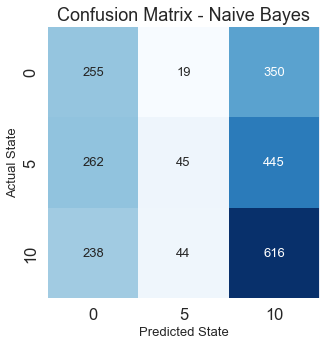

In [14]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5,5)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar= False, square = True, 
                      fmt = 'g', annot_kws = {'size': 13})

ax.set_title('Confusion Matrix - Naive Bayes')
ax.set_xlabel('Predicted State', size = 13)
ax.set_ylabel('Actual State', size = 13)

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','5', '10'])
ax.yaxis.set_ticklabels(['0','5', '10'])

## Display the visualization of the Confusion Matrix.
plt.show()

#### KNN

In [30]:
# Training
blinkKNN = KNeighborsClassifier()
blinkKNN.fit(X_train, y_train)
y_pred = blinkKNN.predict(X_test)
KNNA = round(accuracy_score(y_test, y_pred)*100,2)

# Printing evaluation statistics
print('Classification report')
print('-------------------------------')
print(classification_report(y_test, y_pred))
print('_______________________________')
print('Accuracy: {}%'.format(KNNA))

Classification report
-------------------------------
              precision    recall  f1-score   support

           0       0.31      0.39      0.34       624
           5       0.35      0.34      0.35       752
          10       0.45      0.37      0.41       898

    accuracy                           0.37      2274
   macro avg       0.37      0.37      0.37      2274
weighted avg       0.38      0.37      0.37      2274

_______________________________
Accuracy: 36.81%


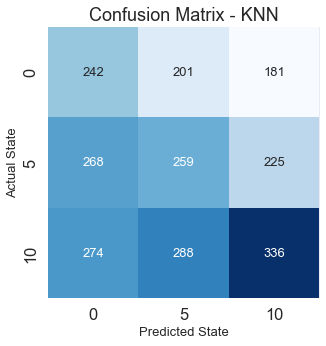

In [31]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5,5)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar= False, square = True, 
                      fmt = 'g', annot_kws = {'size': 13})

ax.set_title('Confusion Matrix - KNN')
ax.set_xlabel('Predicted State', size = 13)
ax.set_ylabel('Actual State', size = 13)

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','5', '10'])
ax.yaxis.set_ticklabels(['0','5', '10'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [32]:
param = [
    {'n_neighbors':  [5,10,15],
     'weights': ['uniform', 'distance'],
     'p':[1,2]}
]

gridKNN = GridSearchCV(KNeighborsClassifier(), param_grid = param, scoring = 'accuracy')
gridKNN_result = gridKNN.fit(X_train,y_train)

print("Best: %f using %s" % (gridKNN_result.best_score_, gridKNN_result.best_params_))
means = gridKNN_result.cv_results_['mean_test_score']
params = gridKNN_result.cv_results_['params']
for mean, param in zip(means, params):
    print("%f with: %r" % (mean, param))

Best: 0.413868 using {'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}
0.371181 with: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.378982 with: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
0.366631 with: {'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
0.376381 with: {'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
0.398483 with: {'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}
0.399133 with: {'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
0.393716 with: {'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}
0.395450 with: {'n_neighbors': 10, 'p': 2, 'weights': 'distance'}
0.413868 with: {'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}
0.405634 with: {'n_neighbors': 15, 'p': 1, 'weights': 'distance'}
0.402167 with: {'n_neighbors': 15, 'p': 2, 'weights': 'uniform'}
0.402817 with: {'n_neighbors': 15, 'p': 2, 'weights': 'distance'}


In [33]:
# Training
blinkKNN = KNeighborsClassifier(n_neighbors = 15, p = 1, weights = 'uniform')
blinkKNN.fit(X_train, y_train)
y_pred = blinkKNN.predict(X_test)

# Printing evaluation statistics
print('Classification report')
print('-------------------------------')
print(classification_report(y_test, y_pred))
print('_______________________________')
print('Accuracy: {}%'.format(KNNA))

Classification report
-------------------------------
              precision    recall  f1-score   support

           0       0.35      0.31      0.33       624
           5       0.39      0.35      0.37       752
          10       0.45      0.53      0.49       898

    accuracy                           0.41      2274
   macro avg       0.40      0.40      0.39      2274
weighted avg       0.40      0.41      0.40      2274

_______________________________
Accuracy: 36.81%


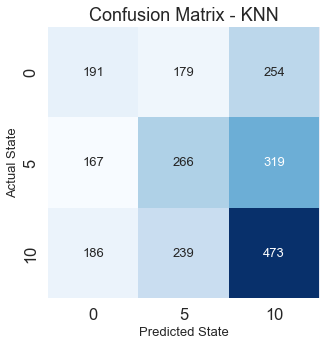

In [34]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5,5)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar= False, square = True, 
                      fmt = 'g', annot_kws = {'size': 13})

ax.set_title('Confusion Matrix - KNN')
ax.set_xlabel('Predicted State', size = 13)
ax.set_ylabel('Actual State', size = 13)

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','5', '10'])
ax.yaxis.set_ticklabels(['0','5', '10'])

## Display the visualization of the Confusion Matrix.
plt.show()

#### Random Forest Classifier

In [35]:
# Training
blinkRF = RandomForestClassifier(random_state = 42)
blinkRF.fit(X_train, y_train)
y_pred = blinkRF.predict(X_test)
RFA = round(accuracy_score(y_test, y_pred)*100,2)

# Printing evaluation statistics
print('Classification report')
print('-------------------------------')
print(classification_report(y_test, y_pred))
print('_______________________________')
print('Accuracy: {}%'.format(round(accuracy_score(y_test, y_pred)*100,2)))

Classification report
-------------------------------
              precision    recall  f1-score   support

           0       0.34      0.31      0.32       624
           5       0.35      0.35      0.35       752
          10       0.45      0.48      0.47       898

    accuracy                           0.39      2274
   macro avg       0.38      0.38      0.38      2274
weighted avg       0.39      0.39      0.39      2274

_______________________________
Accuracy: 39.14%


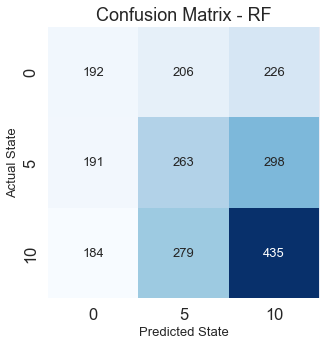

In [36]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5,5)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar= False, square = True, 
                      fmt = 'g', annot_kws = {'size': 13})

ax.set_title('Confusion Matrix - RF')
ax.set_xlabel('Predicted State', size = 13)
ax.set_ylabel('Actual State', size = 13)

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','5', '10'])
ax.yaxis.set_ticklabels(['0','5', '10'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [40]:
param = [
    {'n_estimators': [50,100,150],
     'criterion': ['gini','entropy'],
     'max_depth':[None,1, 2, 3],
     'bootstrap': [True, False],
     'max_features': [1,2,3],
     'warm_start': [True, False]
    }
]

gridRF = GridSearchCV(RandomForestClassifier(random_state = 42), param_grid = param, scoring = 'accuracy')
grid_result = gridRF.fit(X_train,y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print("%f with: %r" % (mean, param))

Best: 0.424052 using {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 3, 'n_estimators': 50, 'warm_start': True}
0.391549 with: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'n_estimators': 50, 'warm_start': True}
0.391549 with: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'n_estimators': 50, 'warm_start': False}
0.394800 with: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'n_estimators': 100, 'warm_start': True}
0.394800 with: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'n_estimators': 100, 'warm_start': False}
0.397833 with: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'n_estimators': 150, 'warm_start': True}
0.397833 with: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'n_estimators': 150, 'warm_start': False}
0.395883 with: {'bootstrap': True, 'criterion': 'gin

In [41]:
# Training
blinkRF = RandomForestClassifier(random_state = 42, bootstrap = True, criterion = 'gini', max_depth = 3, max_features = 3, 
                                 n_estimators = 50, warm_start = True)
blinkRF.fit(X_train, y_train)
y_pred = blinkRF.predict(X_test)
RFA = round(accuracy_score(y_test, y_pred)*100,2)

# Printing evaluation statistics
print('Classification report')
print('-------------------------------')
print(classification_report(y_test, y_pred))
print('_______________________________')
print('Accuracy: {}%'.format(round(accuracy_score(y_test, y_pred)*100,2)))

Classification report
-------------------------------
              precision    recall  f1-score   support

           0       0.41      0.08      0.13       624
           5       0.37      0.45      0.41       752
          10       0.46      0.63      0.53       898

    accuracy                           0.42      2274
   macro avg       0.41      0.39      0.35      2274
weighted avg       0.42      0.42      0.38      2274

_______________________________
Accuracy: 41.86%


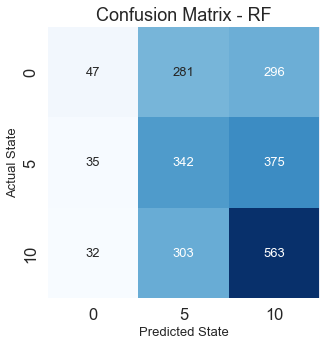

In [42]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5,5)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar= False, square = True, 
                      fmt = 'g', annot_kws = {'size': 13})

ax.set_title('Confusion Matrix - RF')
ax.set_xlabel('Predicted State', size = 13)
ax.set_ylabel('Actual State', size = 13)

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','5', '10'])
ax.yaxis.set_ticklabels(['0','5', '10'])

## Display the visualization of the Confusion Matrix.
plt.show()

#### Gradient Boosting

In [43]:
# Training
blinkGB = GradientBoostingClassifier(random_state = 42)
blinkGB.fit(X_train, y_train)
y_pred = blinkGB.predict(X_test)
GBA = round(accuracy_score(y_test, y_pred)*100,2)

# Printing evaluation statistics
print('Classification report')
print('-------------------------------')
print(classification_report(y_test, y_pred))
print('_______________________________')
print('Accuracy: {}%'.format(round(accuracy_score(y_test, y_pred)*100,2)))

Classification report
-------------------------------
              precision    recall  f1-score   support

           0       0.40      0.21      0.28       624
           5       0.38      0.31      0.34       752
          10       0.45      0.67      0.54       898

    accuracy                           0.42      2274
   macro avg       0.41      0.40      0.39      2274
weighted avg       0.41      0.42      0.40      2274

_______________________________
Accuracy: 42.39%


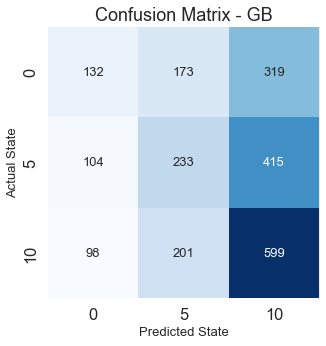

In [44]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5,5)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar= False, square = True, 
                      fmt = 'g', annot_kws = {'size': 13})

ax.set_title('Confusion Matrix - GB')
ax.set_xlabel('Predicted State', size = 13)
ax.set_ylabel('Actual State', size = 13)

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','5', '10'])
ax.yaxis.set_ticklabels(['0','5', '10'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [50]:
param = [
    {
     'criterion': ['friedman_mse','squared_error'],
     'max_depth':[None,1, 2, 3],
     'max_features': [1,2,3],
     'warm_start': [True, False]
    }
]

gridGB = GridSearchCV(GradientBoostingClassifier(random_state = 42), param_grid = param, scoring = 'accuracy')
grid_result = gridGB.fit(X_train,y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print("%f with: %r" % (mean, param))

Best: 0.426652 using {'criterion': 'friedman_mse', 'max_depth': 3, 'max_features': 3, 'warm_start': True}
0.383965 with: {'criterion': 'friedman_mse', 'max_depth': None, 'max_features': 1, 'warm_start': True}
0.383965 with: {'criterion': 'friedman_mse', 'max_depth': None, 'max_features': 1, 'warm_start': False}
0.382449 with: {'criterion': 'friedman_mse', 'max_depth': None, 'max_features': 2, 'warm_start': True}
0.382449 with: {'criterion': 'friedman_mse', 'max_depth': None, 'max_features': 2, 'warm_start': False}
0.389382 with: {'criterion': 'friedman_mse', 'max_depth': None, 'max_features': 3, 'warm_start': True}
0.389382 with: {'criterion': 'friedman_mse', 'max_depth': None, 'max_features': 3, 'warm_start': False}
0.419718 with: {'criterion': 'friedman_mse', 'max_depth': 1, 'max_features': 1, 'warm_start': True}
0.419718 with: {'criterion': 'friedman_mse', 'max_depth': 1, 'max_features': 1, 'warm_start': False}
0.420152 with: {'criterion': 'friedman_mse', 'max_depth': 1, 'max_featur

In [13]:
# Training
blinkGB = GradientBoostingClassifier(random_state = 42, criterion = 'friedman_mse', 
                                     max_depth = 3, max_features = 3, warm_start = True)
blinkGB.fit(X_train, y_train)
y_pred = blinkGB.predict(X_test)
GBA = round(accuracy_score(y_test, y_pred)*100,2)

# Printing evaluation statistics
print('Classification report')
print('-------------------------------')
print(classification_report(y_test, y_pred))
print('_______________________________')
print('Accuracy: {}%'.format(round(accuracy_score(y_test, y_pred)*100,2)))

Classification report
-------------------------------
              precision    recall  f1-score   support

           0       0.40      0.21      0.28       624
           5       0.38      0.31      0.34       752
          10       0.45      0.67      0.54       898

    accuracy                           0.42      2274
   macro avg       0.41      0.40      0.39      2274
weighted avg       0.41      0.42      0.40      2274

_______________________________
Accuracy: 42.39%


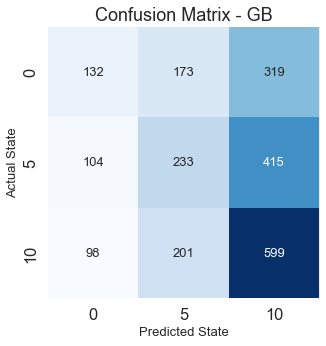

In [14]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5,5)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar= False, square = True, 
                      fmt = 'g', annot_kws = {'size': 13})

ax.set_title('Confusion Matrix - GB')
ax.set_xlabel('Predicted State', size = 13)
ax.set_ylabel('Actual State', size = 13)

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','5', '10'])
ax.yaxis.set_ticklabels(['0','5', '10'])

## Display the visualization of the Confusion Matrix.
plt.show()

#### Neural Network

In [26]:
# Splitting data into features and target
y = df.State
X = df[['Amplitude','Frequency','Duration']]

# Encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# Convert integers to dummy variables 
dummy_y = np_utils.to_categorical(encoded_Y)
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size = 0.33,random_state = 42)
y_test_temp = encoder.inverse_transform(np.argmax(y_test, axis = -1))

In [32]:
# Defining the model
blinkNN = Sequential()
blinkNN.add(Dense(2, input_dim=3, activation='relu'))
blinkNN.add(Dense(3, activation='softmax'))

# Compiling the model 
blinkNN.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

blinkNN.fit(X_train, y_train, epochs=50, batch_size=16, verbose = 0)

y_pred = blinkNN.predict(X_test)
y_pred = encoder.inverse_transform(np.argmax(y_pred, axis = -1))
NNA = round(accuracy_score(y_test_temp, y_pred)*100,2)
# Printing evaluation statistics
print('Classification report')
print('-------------------------------')
print(classification_report(y_test_temp, y_pred))
print('_______________________________')
print('Accuracy: {}%'.format(round(accuracy_score(y_test_temp, y_pred)*100,2)))

Classification report
-------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       624
           5       0.00      0.00      0.00       752
          10       0.39      1.00      0.57       898

    accuracy                           0.39      2274
   macro avg       0.13      0.33      0.19      2274
weighted avg       0.16      0.39      0.22      2274

_______________________________
Accuracy: 39.49%


C:\Users\pnanp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pnanp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pnanp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


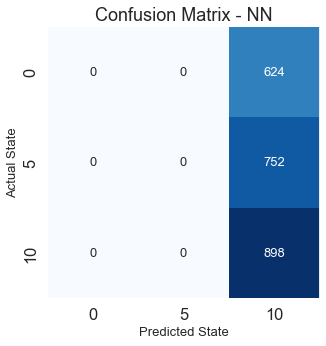

In [33]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test_temp, y_pred)
plt.rcParams['figure.figsize'] = (5,5)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar= False, square = True, 
                      fmt = 'g', annot_kws = {'size': 13})

ax.set_title('Confusion Matrix - NN')
ax.set_xlabel('Predicted State', size = 13)
ax.set_ylabel('Actual State', size = 13)

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','5', '10'])
ax.yaxis.set_ticklabels(['0','5', '10'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [68]:
# Splitting data into features and target
y = df.State
X = df[['Amplitude','Frequency','Duration']]

# Encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# Convert integers to dummy variables 
dummy_y = np_utils.to_categorical(encoded_Y)
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size = 0.33,random_state = 42)
y_test_temp = encoder.inverse_transform(np.argmax(y_test, axis = -1))

# Defining the model
blinkNN = Sequential()
blinkNN.add(Dense(729, input_dim=3, activation='relu'))
blinkNN.add(Dense(243, activation='relu'))
blinkNN.add(Dense(81, activation='relu'))
blinkNN.add(Dense(27, activation='relu'))
blinkNN.add(Dense(9, activation='relu'))
blinkNN.add(Dense(3, activation='softmax'))

# Compiling the model 
blinkNN.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

blinkNN.fit(X_train, y_train, epochs=300, batch_size=400, verbose = 0)

y_pred = blinkNN.predict(X_test)
y_pred = encoder.inverse_transform(np.argmax(y_pred, axis = -1))
NNA = round(accuracy_score(y_test_temp, y_pred)*100,2)
# Printing evaluation statistics
print('Classification report')
print('-------------------------------')
print(classification_report(y_test_temp, y_pred))
print('_______________________________')
print('Accuracy: {}%'.format(round(accuracy_score(y_test_temp, y_pred)*100,2)))

Classification report
-------------------------------
              precision    recall  f1-score   support

           0       0.41      0.44      0.43       624
           5       0.41      0.42      0.42       752
          10       0.55      0.52      0.53       898

    accuracy                           0.46      2274
   macro avg       0.46      0.46      0.46      2274
weighted avg       0.47      0.46      0.46      2274

_______________________________
Accuracy: 46.35%


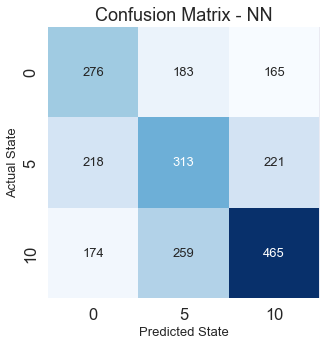

In [69]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test_temp, y_pred)
plt.rcParams['figure.figsize'] = (5,5)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar= False, square = True, 
                      fmt = 'g', annot_kws = {'size': 13})

ax.set_title('Confusion Matrix - NN')
ax.set_xlabel('Predicted State', size = 13)
ax.set_ylabel('Actual State', size = 13)

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','5', '10'])
ax.yaxis.set_ticklabels(['0','5', '10'])

## Display the visualization of the Confusion Matrix.
plt.show()